# Desafio de Detecção e Redução de Fraudes no Setor Financeiro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Importando dados
data_fraude = pd.read_csv("fraud_detection_dataset.csv")
fraude = data_fraude[:]

In [4]:
fraude

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
# Verificando os tipos de dados do dataset #Não há valores ausentes
fraude.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Verificando dados que foram classificados como fraude
fraude[fraude['isFraud'] ==1][:20]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.00,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.00,0.00,1,0


In [ ]:
# As fraudes acontecem em TRANSFER e CASH_OUT

In [7]:
# Verificando dados que foram classificados como fraude por transferência >200.000 
fraude[:][fraude['isFlaggedFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [ ]:
# Dos 16 registros de fraude com valor >200.000, TODOS possuem as variáveis oldbalanceDest e newbalanceDest com 0.

# As variáveis oldbalanceOrg e newbalanceOrg também possuem exatamente o mesmo valor, não é descontado o valor 
# em dinheiro na transação

##  Tratamento de Dados

In [8]:
fraude.describe() # A diferença de intervalos nos valores numéricos implica necessidade de normalização

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
# Verificar a distribuição da variável type, para ver quando a fraude ocorre com mais frequência

print(fraude['type'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


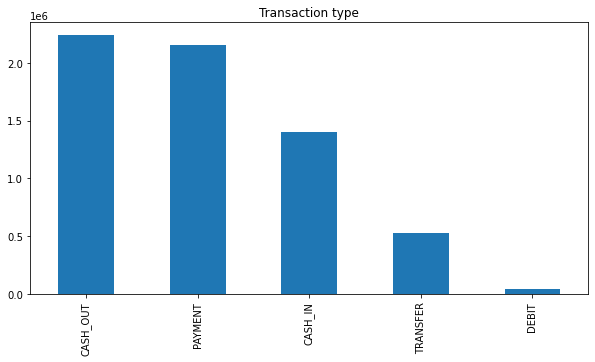

In [10]:
# Verificar a distribuição da variável type, para ver quando a fraude ocorre com mais frequência
print(fraude.type.value_counts())

f, ax = plt.subplots(figsize=(10, 5))
fraude.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(10,5))
plt.show()

In [11]:
fraude_isFraud = fraude[(fraude['isFraud'] == 1)]
fraude_isFraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


0    6354407
1       8213
Name: isFraud, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

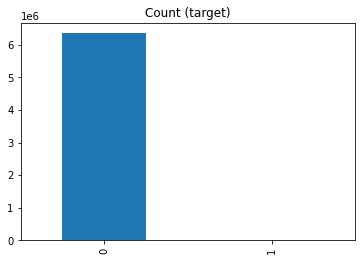

In [12]:
print(fraude['isFraud'].value_counts()) # De 6354407 dados, 8213 são fraude
fraude['isFraud'].value_counts().plot(kind='bar', title='Count (target)')

[Text(0, 0, 'Not Fraud'), Text(1, 0, 'Fraud')]

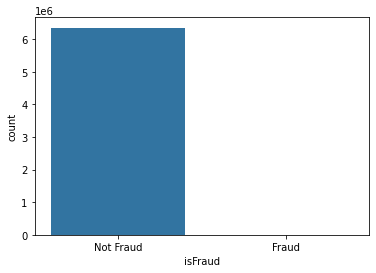

In [13]:
g = sns.countplot('isFraud', data=fraude)
g.set_xticklabels(['Not Fraud', 'Fraud'])

In [ ]:
# As classes se encontram muito desbalanceadas. 

In [14]:
# Quais tipos de transações são mais comuns ao cometer fraudes?
print(fraude[(fraude['isFraud'] == 1)]['type'].value_counts())

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


<AxesSubplot:xlabel='isFraud', ylabel='amount'>

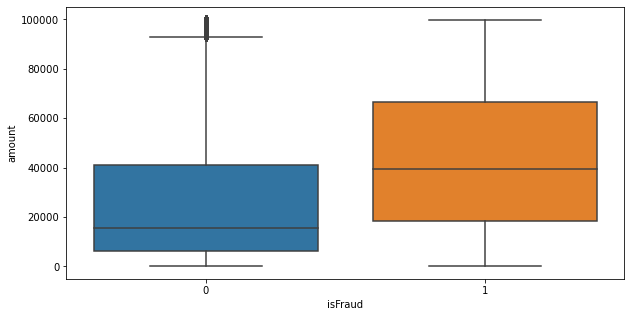

In [15]:
# Distribuicao de isFraud com amount
plt.figure(figsize=(10,5))
sns.boxplot(x = 'isFraud', y = 'amount', data = fraude[fraude.amount < 1e5]) #Fraude mais comum com valores mais altos

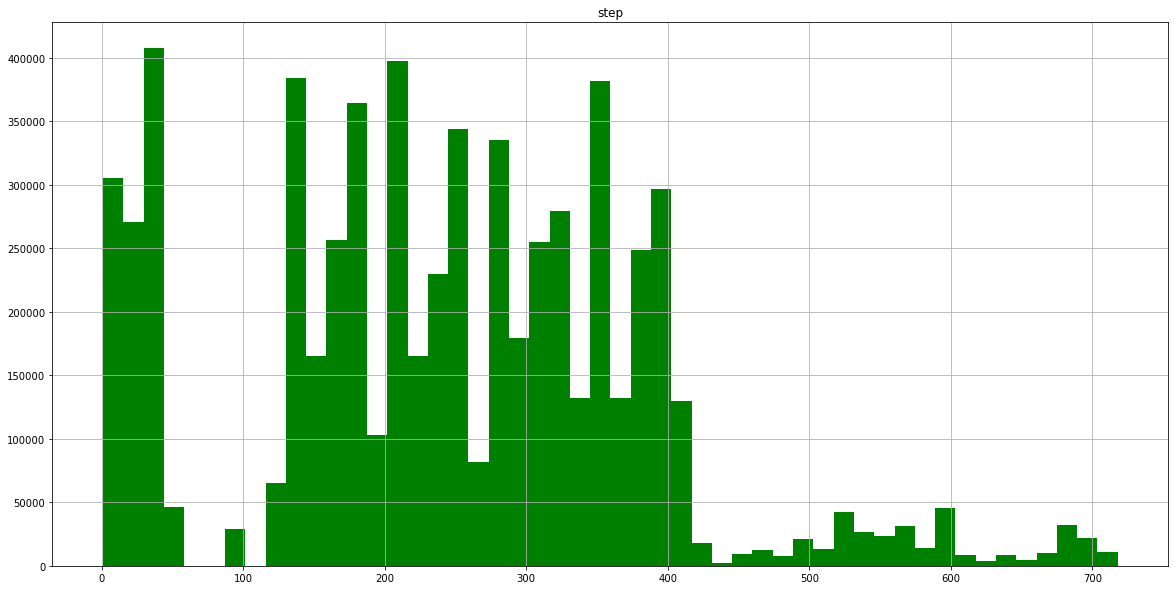

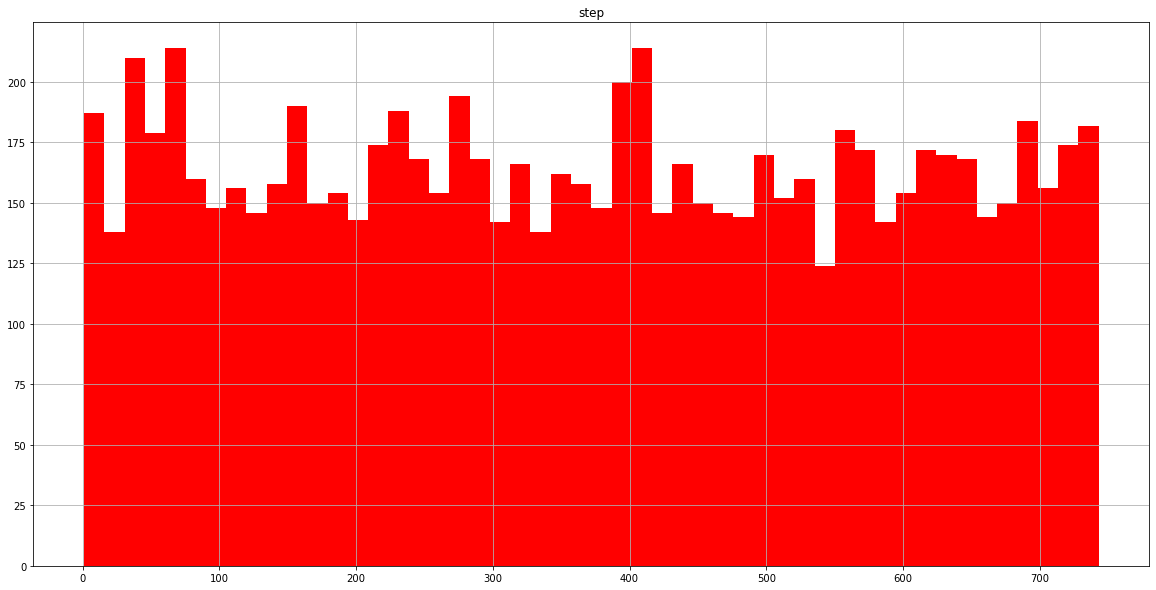

<Figure size 288x144 with 0 Axes>

In [280]:
# Variável step é o momento da simulação (30 dias), em que a transação é realizada
bins = 50

fraude[(fraude['isFraud'] == 0)].hist(column="step",color="green",bins=bins)

fraude[(fraude['isFraud'] == 1)].hist(column ="step",color="red",bins=bins)

plt.figure(figsize=(4,2))
plt.show()

In [ ]:
# Após a etapa 400 as transações reais diminuem consideravelmente, enquanto as fraudulentas permanecem constantes.

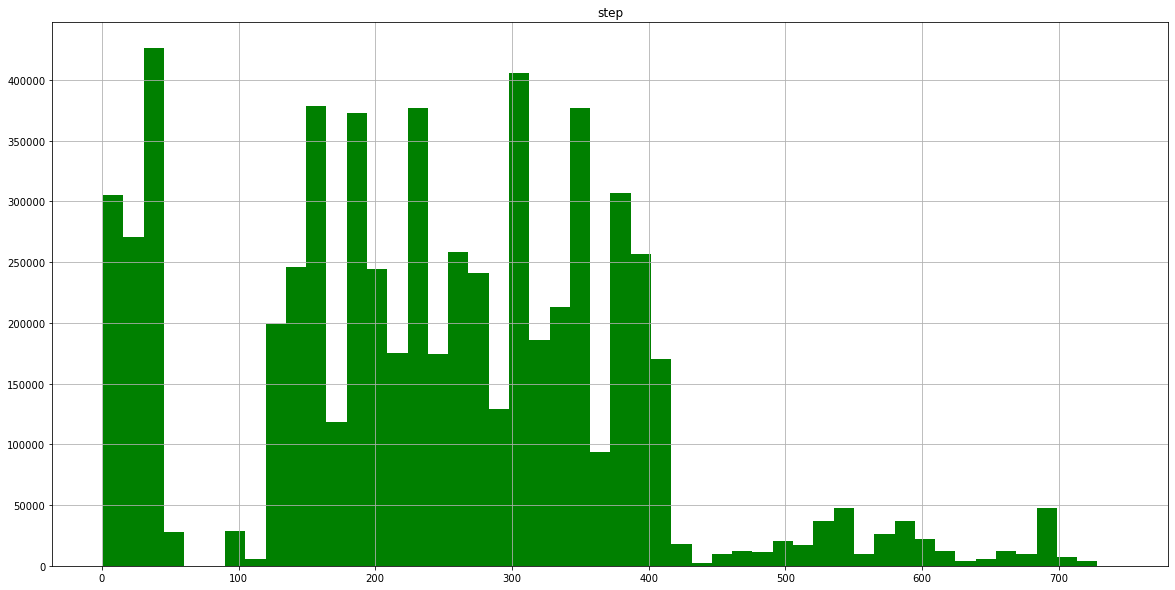

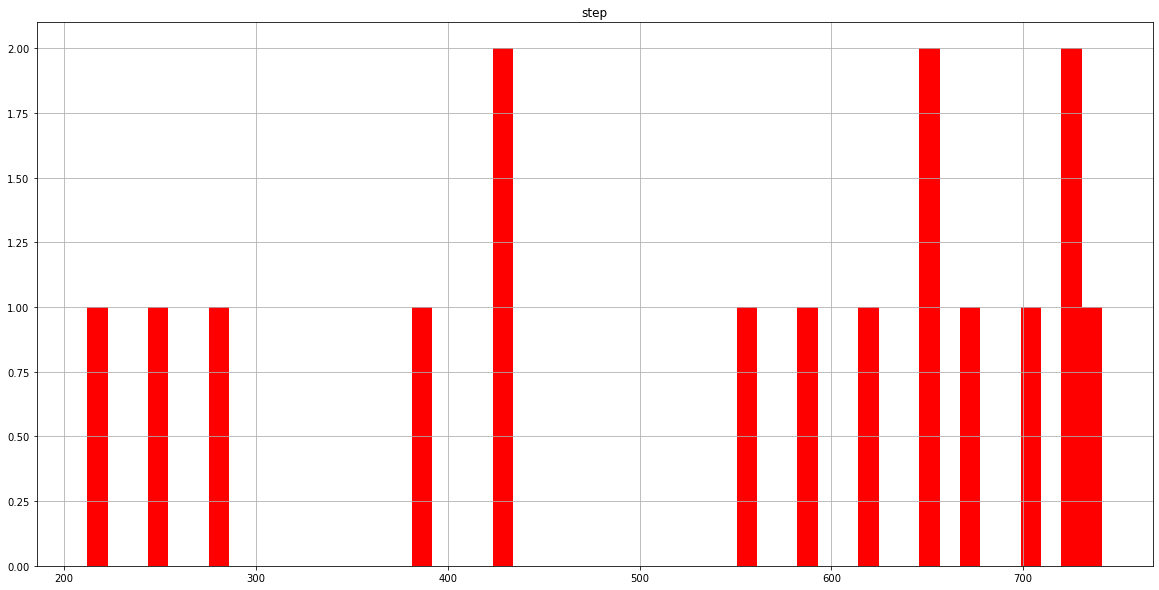

<Figure size 288x144 with 0 Axes>

In [282]:
bins = 50

fraude[(fraude['isFlaggedFraud'] == 0)].hist(column="step",color="green",bins=bins)

fraude[(fraude['isFlaggedFraud'] == 1)].hist(column ="step",color="red",bins=bins)

plt.figure(figsize=(4,2))
plt.show()

In [18]:
# Criando variáveis dummy e eliminando as categóricas
# Eliminando as contas de destino e origem porque não foram consideradas variáveis importantes
dataset = pd.concat([fraude.drop(columns=['isFraud','isFlaggedFraud']),pd.get_dummies(fraude.type)] ,axis=1)
dataset = dataset.drop(['type', 'nameOrig', 'nameDest'],1)
dataset = pd.concat([dataset,fraude.iloc[:,-2:]],axis=1)
pd.DataFrame.head(dataset)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0,0,0


## Análise Exploratória

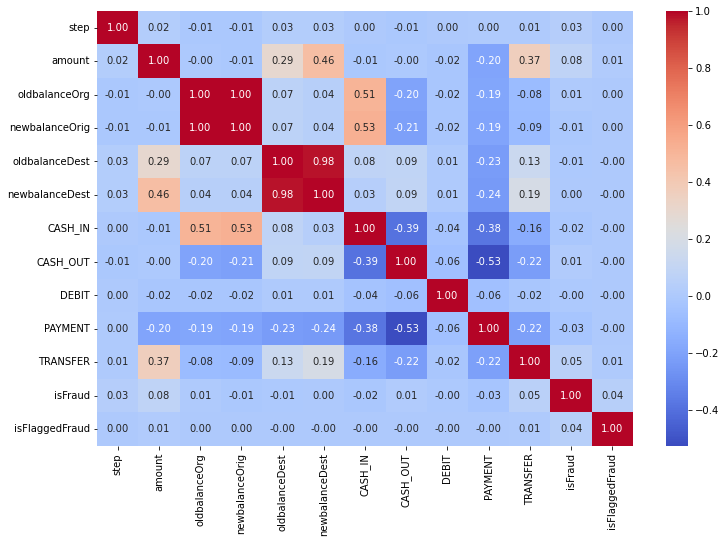

In [19]:
# Verificar a matriz de correlação entre as features
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))

sns.heatmap(
    dataset.corr(), 
    annot=True,    
    fmt='.2f',    
    cmap='coolwarm',   
)

plt.show()

In [20]:
# Matriz de correlação
quantitativas = dataset.iloc[:,:6]

In [21]:
quantitativas.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [22]:
corr_mat = quantitativas.corr(method="pearson")
corr_mat.style.background_gradient(cmap='coolwarm')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000


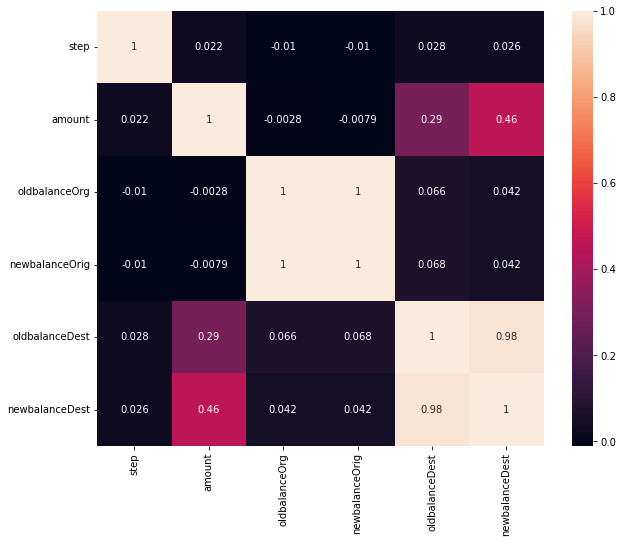

In [283]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)
plt.show()

In [ ]:
# Correlação entre as seguintes variáveis: oldbalanceDest e newbalanceDest / oldbalanceOrg e newbalanceOrig
# Isso porque quando o dinheiro é enviado a um destinatário, este aumenta seu capital, enquanto a origem diminui.

In [284]:
total = dataset['isFraud'].value_counts()[0] + fraude['isFraud'].value_counts()[1]
fraud = (fraude['isFraud'].value_counts()[1]/total) * 100
print('Porcentagem de fraude:', fraud)

Porcentagem de fraude: 0.12908204481801522


## Modelagem

In [112]:
# BALANCEAMENTO DAS CLASSES

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.neighbors import DistanceMetric
from collections import Counter

In [142]:
#Separar dados em treino e teste
X = dataset.drop(columns = ['isFraud', 'isFlaggedFraud'])
y = dataset['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [138]:
len(X_train)

4262955

In [139]:
len(X_test)

2099665

No handles with labels found to put in legend.


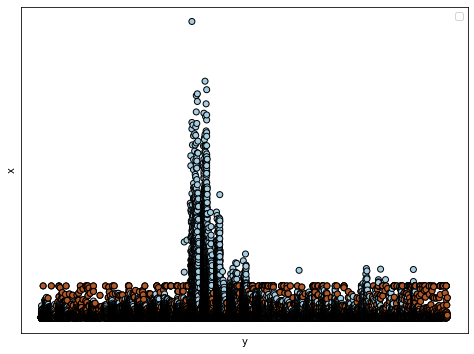

In [78]:
# Visualização do dataset
plt.figure(1, figsize=(8, 6))

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('y')
plt.ylabel('x')

plt.xticks(())
plt.yticks(())

plt.legend()
plt.show()

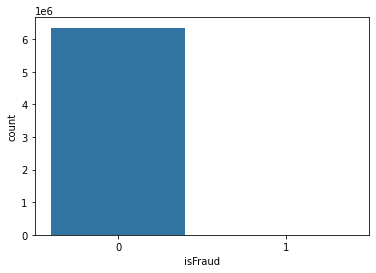

In [98]:
# Vizualização da distribuição
g = sns.countplot(y)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from imblearn.under_sampling import ClusterCentroids 

#### Baseline - Regressão Logística

In [144]:
# Baseline - Regressão Logística
logreg_baseline = LogisticRegression(max_iter=200)
logreg_baseline.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [145]:
y_pred_baseline = logreg_baseline.predict(X_test)

In [146]:
confusion_matrix(y_test, y_pred_baseline)

array([[2095012,    1987],
       [   1497,    1169]], dtype=int64)

In [147]:
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.37      0.44      0.40      2666

    accuracy                           1.00   2099665
   macro avg       0.68      0.72      0.70   2099665
weighted avg       1.00      1.00      1.00   2099665



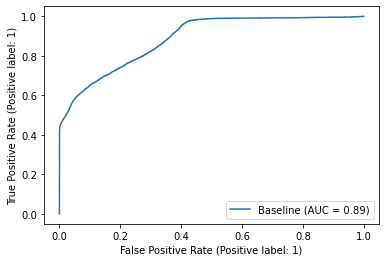

In [84]:
metrics.plot_roc_curve(logreg_baseline, X_train, y_train, name='Baseline')
plt.show()

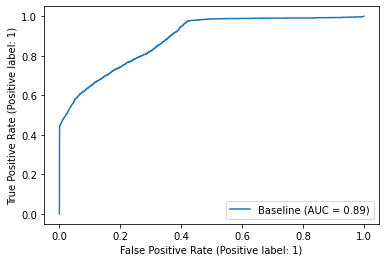

In [85]:
metrics.plot_roc_curve(logreg_baseline, X_test, y_test, name='Baseline')
plt.show()

#### Balanceamento dos Dados com Under-Sampling (RUS)

In [ ]:
#Não rodei porque demorava muito tempo e no modelo com poucas amostras, já teve um desempenho ruim
print('Antes %s' % Counter(y_train))
cc = ClusterCentroids(random_state=42, sampling_strategy=0.35)
X_under, y_under = cc.fit_resample(X_train, y_train)
print('Resultado após o under sampling %s' % Counter(y_under))

In [ ]:
len(X_under[y_under == 0]) #notfraud

In [ ]:
len(X_under[y_under == 1]) #isfraud

In [ ]:
g = sns.countplot(y_train)
plt.title("Antes do Under Sampling")
plt.ylim([0,6000])
plt.show()

In [ ]:
g = sns.countplot(y_under)
plt.title("Depois do Under Sampling")
plt.ylim([0,6000])
plt.show()

In [140]:
logreg = LogisticRegression()
logreg.fit(X_under, y_under)
y_pred = logreg.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
metrics.plot_roc_curve(logreg, X_train, y_train, name='Under-sampling - Centroids')
plt.show()

In [ ]:
metrics.plot_roc_curve(logreg, X_test, y_test, name='Under-sampling - Centroids')
plt.show()

#### Balanceamento dos Dados com Over-Sampling (SMOTE) #escolhido

In [149]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42, sampling_strategy=0.22)
X_smo, y_smo = smo.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_smo))

Resultado após o oversampling Counter({0: 4257408, 1: 936629})


In [150]:
len(X_smo[y_smo == 0])

4257408

In [151]:
len(X_smo[y_smo == 1])

936629

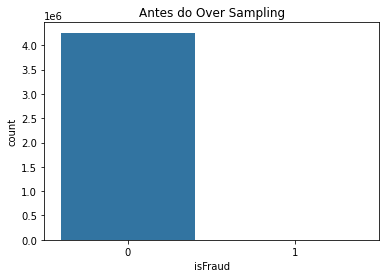

In [152]:
g = sns.countplot(y_train)
plt.title("Antes do Over Sampling")
plt.show()

In [153]:
logreg = LogisticRegression()
logreg.fit(X_smo, y_smo)
y_pred = logreg.predict(X_test)

In [154]:
confusion_matrix(y_test, y_pred)

array([[2043470,   53529],
       [    524,    2142]], dtype=int64)

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99   2096999
           1       0.04      0.80      0.07      2666

    accuracy                           0.97   2099665
   macro avg       0.52      0.89      0.53   2099665
weighted avg       1.00      0.97      0.99   2099665



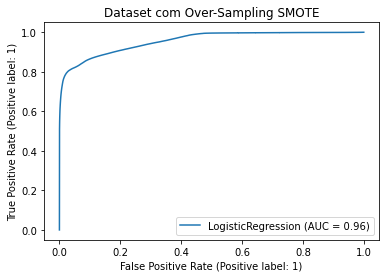

In [156]:
metrics.plot_roc_curve(logreg, X_smo, y_smo)
plt.title("Dataset com Over-Sampling SMOTE")
plt.show()

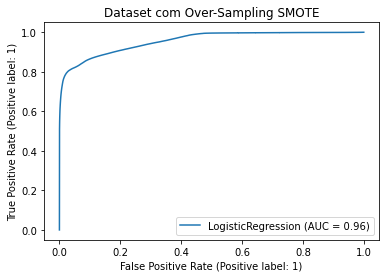

In [157]:
metrics.plot_roc_curve(logreg, X_smo, y_smo)
plt.title("Dataset com Over-Sampling SMOTE")
plt.show()

#### Balanceamento dos Dados com Over-Sampling (ADASYN)

In [158]:
# Balanceamento dos dados
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42, sampling_strategy=0.22)
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_ada))

Resultado após o oversampling Counter({0: 4257408, 1: 936825})


In [159]:
len(X_ada[y_ada == 0])

4257408

In [160]:
len(X_ada[y_ada == 1])

936825

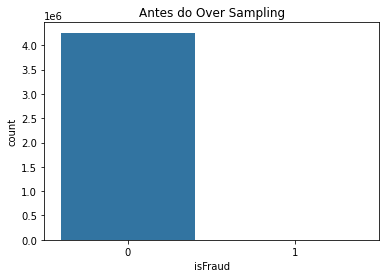

In [161]:
g = sns.countplot(y_train)
plt.title("Antes do Over Sampling")
plt.show()

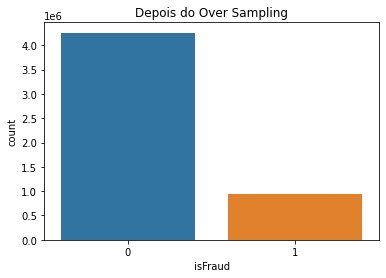

In [162]:
g = sns.countplot(y_ada)
plt.title("Depois do Over Sampling")
plt.show()

In [163]:
logreg = LogisticRegression()
logreg.fit(X_ada, y_ada)
y_pred = logreg.predict(X_test)

In [164]:
confusion_matrix(y_test, y_pred)

array([[2021514,   75485],
       [    384,    2282]], dtype=int64)

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   2096999
           1       0.03      0.86      0.06      2666

    accuracy                           0.96   2099665
   macro avg       0.51      0.91      0.52   2099665
weighted avg       1.00      0.96      0.98   2099665



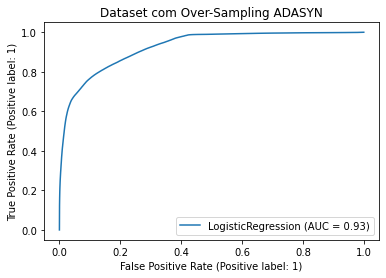

In [166]:
metrics.plot_roc_curve(logreg, X_ada, y_ada)
plt.title("Dataset com Over-Sampling ADASYN")
plt.show()

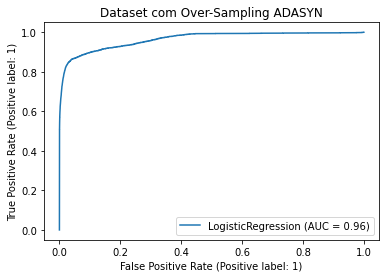

In [167]:
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.title("Dataset com Over-Sampling ADASYN")
plt.show()

#### SMOTEENN 1:10

In [168]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42, sampling_strategy=0.1)

print('Antes %s' % Counter(y_train))

X_res, y_res = sme.fit_resample(X_train, y_train)
print('Resultado após a aplicação das duas estratégias combinadas %s' % Counter(y_res))

Antes Counter({0: 4257408, 1: 5547})
Resultado após a aplicação das duas estratégias combinadas Counter({0: 4239998, 1: 418590})


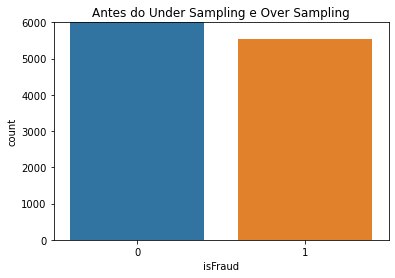

In [169]:
g = sns.countplot(y_train)
plt.title("Antes do Under Sampling e Over Sampling")
plt.ylim([0,6000])
plt.show()

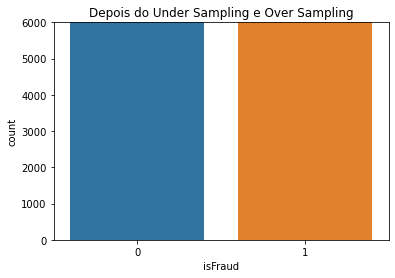

In [64]:
g = sns.countplot(y_res)
plt.title("Depois do Under Sampling e Over Sampling")
plt.ylim([0,6000])
plt.show()

In [170]:
logreg = LogisticRegression()
logreg.fit(X_res, y_res)
y_pred = logreg.predict(X_test)

In [171]:
confusion_matrix(y_test, y_pred)

array([[2060763,   36236],
       [    665,    2001]], dtype=int64)

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96   2096999
           1       0.02      0.89      0.03      2666

    accuracy                           0.93   2099665
   macro avg       0.51      0.91      0.50   2099665
weighted avg       1.00      0.93      0.96   2099665



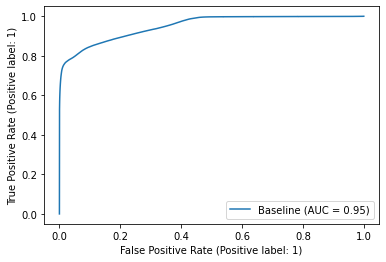

In [68]:
metrics.plot_roc_curve(logreg, X_res, y_res, name='Baseline')
plt.show()

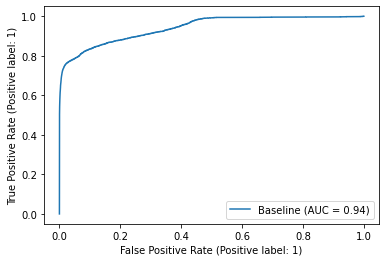

In [69]:
metrics.plot_roc_curve(logreg, X_test, y_test, name='Baseline')
plt.show()

## Análise dos Resultados

In [ ]:
#Construção do dataset para análises finais

In [185]:
y_df = pd.DataFrame(y_smo, columns=['isFraud'])

In [192]:
X_df = pd.DataFrame(X_smo, columns=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 
                                    'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'])

In [193]:
newdf = pd.concat([X_df, y_df], axis=1)
newdf

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,132,1.869945e+05,4.980000e+03,191974.49,2.565464e+06,2.225790e+06,1,0,0,0,0,0
1,133,8.637761e+04,3.148000e+04,0.00,0.000000e+00,8.637761e+04,0,1,0,0,0,0
2,132,2.154892e+05,2.151800e+04,0.00,6.345757e+06,6.794955e+06,0,1,0,0,0,0
3,588,6.973192e+05,2.549300e+04,0.00,2.150240e+06,2.847559e+06,0,0,0,0,1,0
4,323,5.924358e+04,2.987900e+04,0.00,0.000000e+00,0.000000e+00,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5194032,57,2.873439e+05,2.873439e+05,0.00,3.358121e+06,3.645464e+06,0,1,0,0,0,1
5194033,313,1.117586e+06,1.117586e+06,0.00,3.718606e+06,4.836192e+06,0,1,0,0,0,1
5194034,291,2.088882e+05,2.088882e+05,0.00,0.000000e+00,2.088882e+05,0,1,0,0,0,1
5194035,664,2.265334e+05,2.265334e+05,0.00,7.118311e+05,9.383645e+05,0,1,0,0,0,1


In [197]:
# Decision Tree com dados desbalanceados
train_X, test_X, train_y, test_y = train_test_split(dataset.drop(columns=["isFraud"]), dataset.isFraud, test_size=1/7.0, random_state=0)

DT = tree.DecisionTreeClassifier()

DT.fit(train_X, train_y)

predictions = DT.predict(test_X)

In [198]:
print(DT.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, DT.predict(test_X)))

0.9997227558072757
[[907659    118]
 [   134   1035]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907777
           1       0.90      0.89      0.89      1169

    accuracy                           1.00    908946
   macro avg       0.95      0.94      0.95    908946
weighted avg       1.00      1.00      1.00    908946



In [199]:
# Decision Tree com dados balanceados
train_X, test_X, train_y, test_y = train_test_split(newdf.drop(columns=["isFraud"]), newdf.isFraud, test_size=1/7.0, random_state=0)

DT = tree.DecisionTreeClassifier()

DT.fit(train_X, train_y)

predictions = DT.predict(test_X)

In [200]:
print(DT.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, DT.predict(test_X)))

0.999366581941386
[[608024    296]
 [   174 133512]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    608320
           1       1.00      1.00      1.00    133686

    accuracy                           1.00    742006
   macro avg       1.00      1.00      1.00    742006
weighted avg       1.00      1.00      1.00    742006



In [ ]:
# Melhorou a previsão de observações que são fraudes e manteve aquelas que não são.

In [201]:
# Random Forest com dados desbalanceados
train_X, test_X, train_y, test_y = train_test_split(dataset.drop(columns=["isFraud"]), dataset.isFraud, test_size=1/7.0, random_state=0)

RF = RandomForestClassifier()

RF.fit(train_X, train_y)

predictions = RF.predict(test_X)

In [202]:
print(RF.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, RF.predict(test_X)))

0.9997227558072757
[[907760     17]
 [   235    934]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907777
           1       0.98      0.80      0.88      1169

    accuracy                           1.00    908946
   macro avg       0.99      0.90      0.94    908946
weighted avg       1.00      1.00      1.00    908946



In [203]:
# Random Forest com dados balanceados
train_X, test_X, train_y, test_y = train_test_split(newdf.drop(columns=["isFraud"]), newdf.isFraud, test_size=1/7.0, random_state=0)

RF = RandomForestClassifier()

RF.fit(train_X, train_y)

predictions = RF.predict(test_X)

In [204]:
print(RF.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, RF.predict(test_X)))

0.9994083605792945
[[607933    387]
 [    52 133634]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    608320
           1       1.00      1.00      1.00    133686

    accuracy                           1.00    742006
   macro avg       1.00      1.00      1.00    742006
weighted avg       1.00      1.00      1.00    742006



In [205]:
# Regressão Logística com dados desbalanceados
train_X, test_X, train_y, test_y = train_test_split(dataset.drop(columns=["isFraud"]), dataset.isFraud, test_size=1/7.0, random_state=0)

LR = LogisticRegression()

LR.fit(train_X, train_y)

predictions = LR.predict(test_X)

In [206]:
print(LR.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, LR.predict(test_X)))

0.9982265173068587
[[906850    927]
 [   685    484]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907777
           1       0.34      0.41      0.38      1169

    accuracy                           1.00    908946
   macro avg       0.67      0.71      0.69    908946
weighted avg       1.00      1.00      1.00    908946



In [208]:
# Regressão Logística com dados balanceados
train_X, test_X, train_y, test_y = train_test_split(newdf.drop(columns=["isFraud"]), newdf.isFraud, test_size=1/7.0, random_state=0)

LR = LogisticRegression()

LR.fit(train_X, train_y)

predictions = LR.predict(test_X)

In [209]:
print(LR.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, LR.predict(test_X)))

0.9426541025274728
[[592717  15603]
 [ 26948 106738]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    608320
           1       0.87      0.80      0.83    133686

    accuracy                           0.94    742006
   macro avg       0.91      0.89      0.90    742006
weighted avg       0.94      0.94      0.94    742006



### Normalizacão dos dados

In [ ]:
# Como visto com a função describe(), há uma grande diferença na escala das variáveis numéricas.

# A seguir, os gráficos da distribuição das variáveis e posteriormernte dos dados normalizados.


<AxesSubplot:ylabel='Density'>

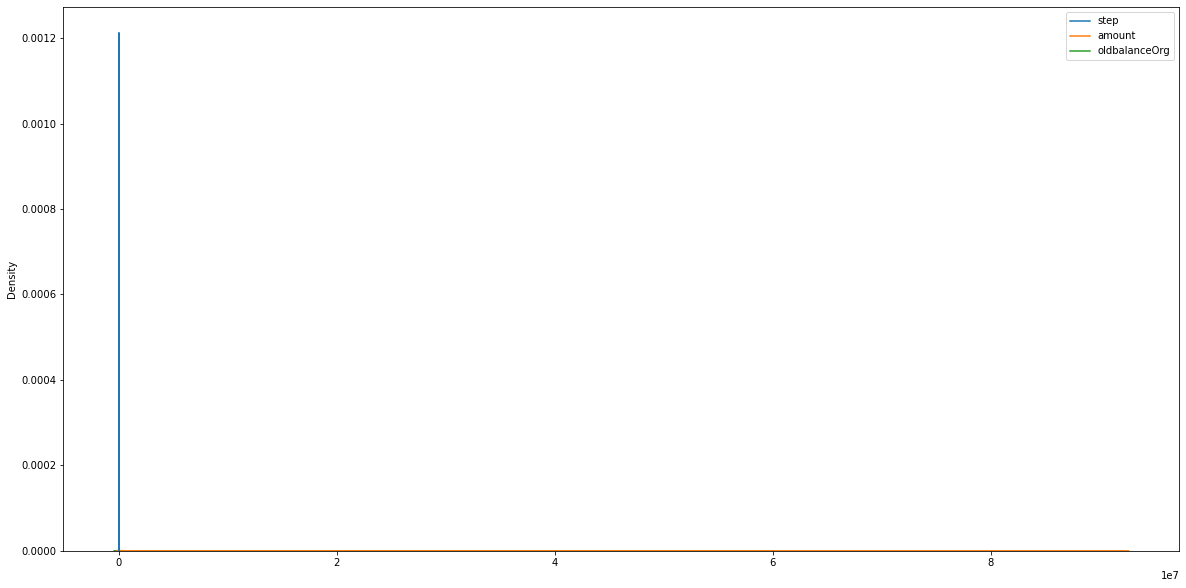

In [210]:
plt.rcParams['figure.figsize']=[20,10]
sns.kdeplot(data=newdf.iloc[:,:3])

In [211]:
# normalizando com Z-score
col_names = newdf.iloc[:,:6].columns
col_names

s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(newdf.iloc[:,:6])
df_s = pd.DataFrame(df_s, columns=col_names)

<AxesSubplot:ylabel='Density'>

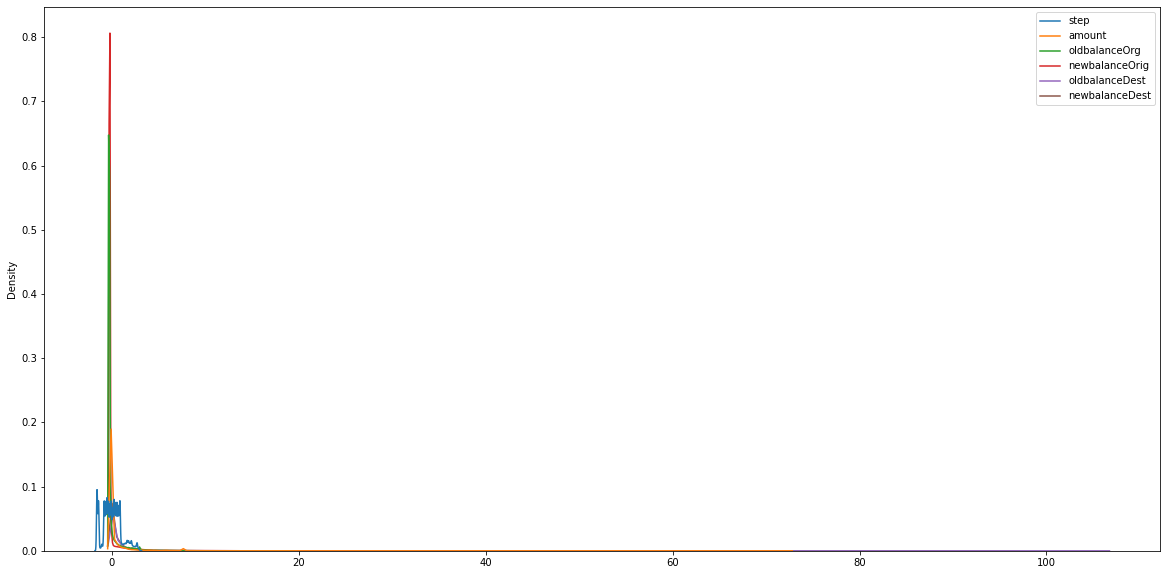

In [212]:
plt.rcParams['figure.figsize']=[20,10]
sns.kdeplot(data=df_s[col_names])

In [213]:
# Concatenando os dados normalizados
dfnormal = pd.concat([df_s, newdf.iloc[:,6:]], axis = 1)

In [214]:
# Observa-se que agora as variáveis estão em uma faixa mais semelhante.
dfnormal

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,-0.855321,-0.179018,-0.323173,-0.195502,0.470248,0.270972,1,0,0,0,0,0
1,-0.848959,-0.258460,-0.314412,-0.264662,-0.300166,-0.313421,0,1,0,0,0,0
2,-0.855321,-0.156520,-0.317705,-0.264662,1.605479,1.519066,0,1,0,0,0,0
3,2.045660,0.223910,-0.316391,-0.264662,0.345556,0.440812,0,0,0,0,1,0
4,0.359783,-0.279884,-0.314941,-0.264662,-0.300166,-0.337016,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5194032,-1.332456,-0.099787,-0.229816,-0.264662,0.708285,0.658764,0,1,0,0,0,1
5194033,0.296165,0.555734,0.044686,-0.264662,0.816539,0.984018,0,1,0,0,0,1
5194034,0.156205,-0.161732,-0.255755,-0.264662,-0.300166,-0.279957,0,1,0,0,0,1
5194035,2.529156,-0.147800,-0.249921,-0.264662,-0.086402,-0.080696,0,1,0,0,0,1


## Refazendo as análises com os dados normalizados


In [216]:
#Separar dados em treino e teste
X = dfnormal.drop(columns = ['isFraud'])
y = dfnormal['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [217]:
len(X_train)

3480004

In [218]:
len(X_test)

1714033

No handles with labels found to put in legend.


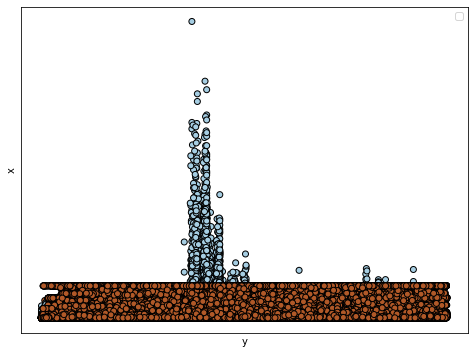

In [219]:
# Visualização do dataset
plt.figure(1, figsize=(8, 6))

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('y')
plt.ylabel('x')

plt.xticks(())
plt.yticks(())

plt.legend()
plt.show()

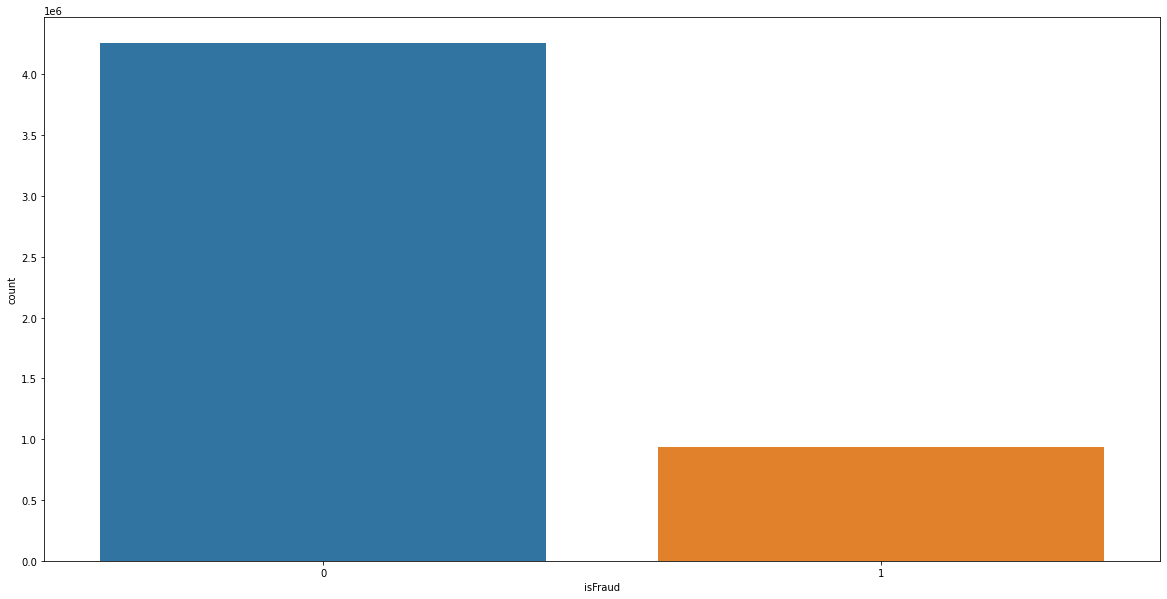

In [220]:
g = sns.countplot(y)
plt.show()

#### Baseline - Regressão Logística

In [221]:
logreg_baseline = LogisticRegression(max_iter=200)
logreg_baseline.fit(X_train, y_train)

y_pred_baseline = logreg_baseline.predict(X_test)

confusion_matrix(y_test, y_pred_baseline)

array([[1387897,   17344],
       [  38719,  270073]], dtype=int64)

In [222]:
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98   1405241
           1       0.94      0.87      0.91    308792

    accuracy                           0.97   1714033
   macro avg       0.96      0.93      0.94   1714033
weighted avg       0.97      0.97      0.97   1714033



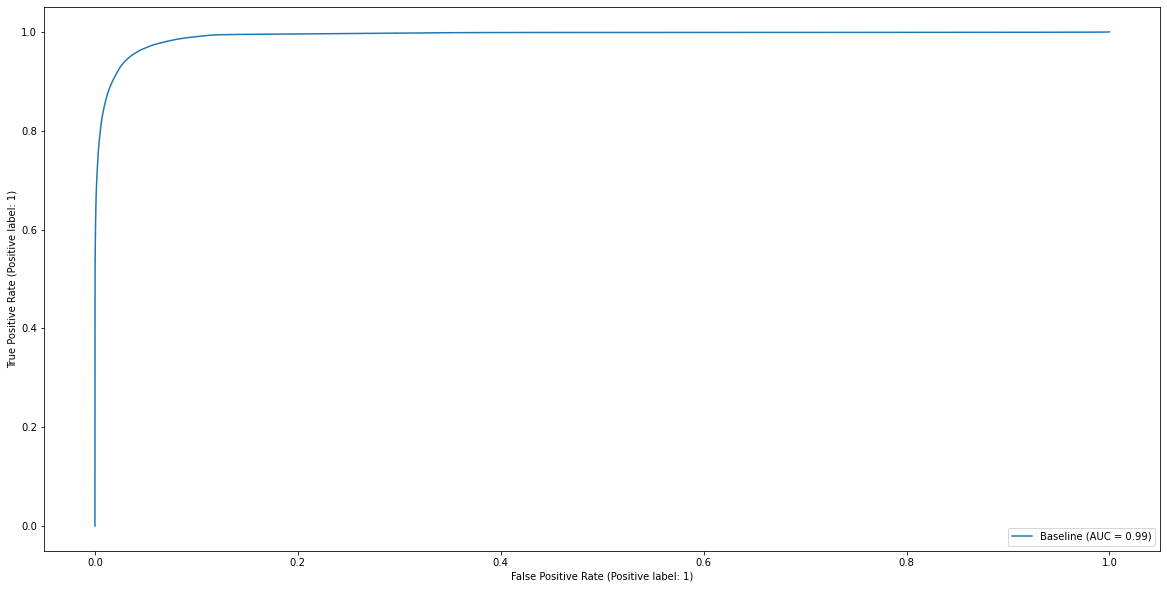

In [223]:
metrics.plot_roc_curve(logreg_baseline, X_train, y_train, name='Baseline')
plt.show()

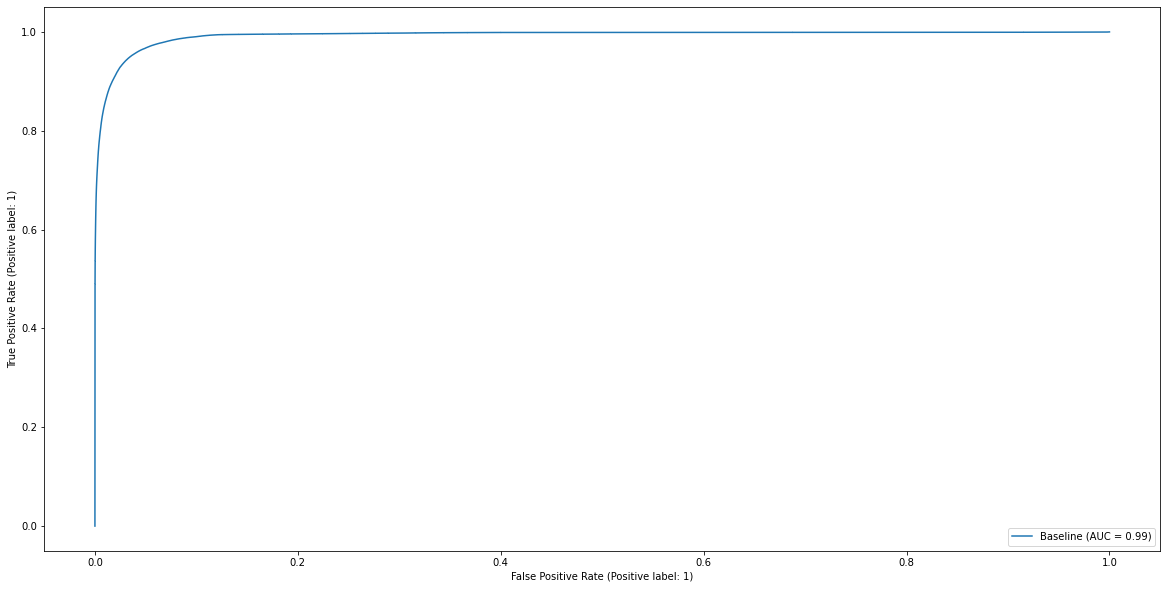

In [224]:
metrics.plot_roc_curve(logreg_baseline, X_test, y_test, name='Baseline')
plt.show()

#### Balanceamento dos dados SMOTE

In [226]:
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_smo, y_smo = smo.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_smo))

Resultado após o oversampling Counter({0: 2852167, 1: 2852167})


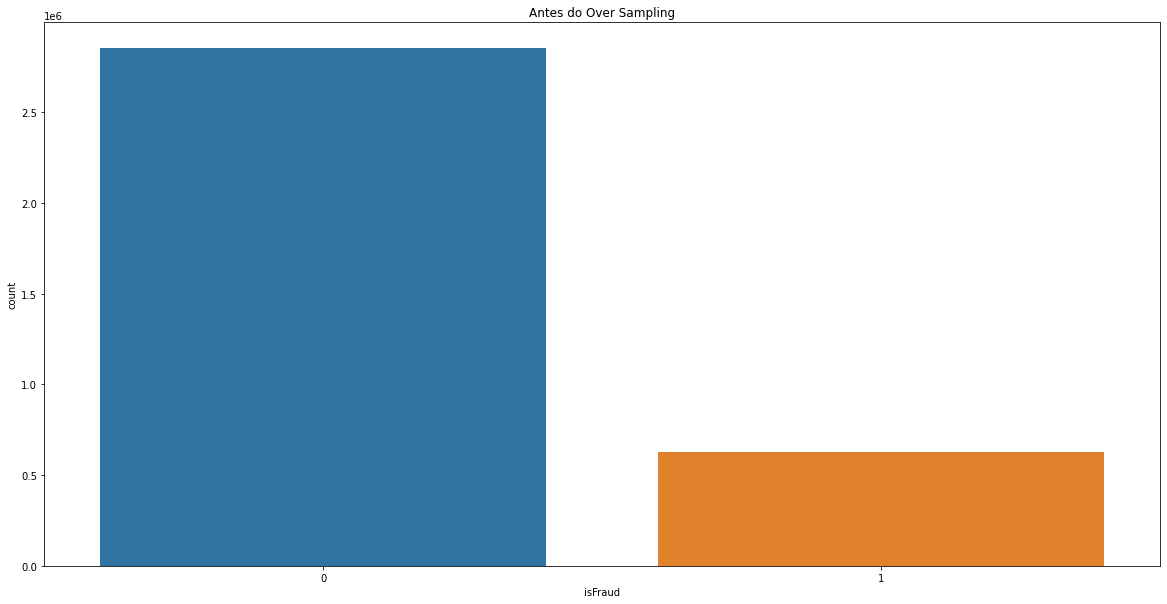

In [227]:
g = sns.countplot(y_train)
plt.title("Antes do Over Sampling")
plt.show()

In [228]:
logreg = LogisticRegression()
logreg.fit(X_smo, y_smo)
y_pred = logreg.predict(X_test)

In [229]:
confusion_matrix(y_test, y_pred)

array([[1338037,   67204],
       [  12477,  296315]], dtype=int64)

In [230]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97   1405241
           1       0.82      0.96      0.88    308792

    accuracy                           0.95   1714033
   macro avg       0.90      0.96      0.93   1714033
weighted avg       0.96      0.95      0.95   1714033



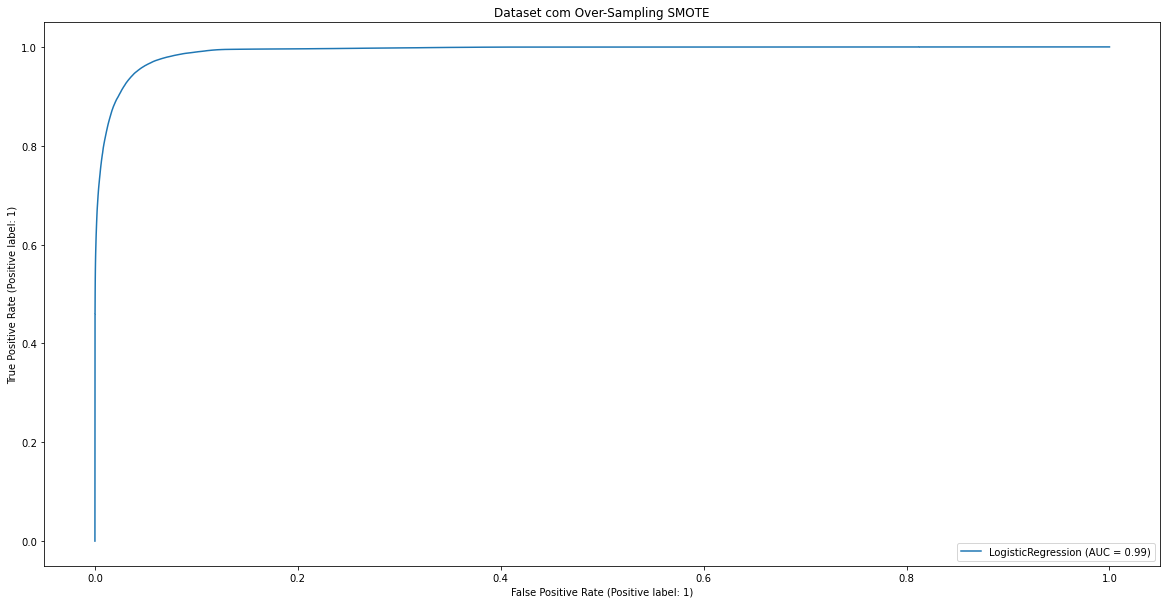

In [231]:
metrics.plot_roc_curve(logreg, X_smo, y_smo)
plt.title("Dataset com Over-Sampling SMOTE")
plt.show()

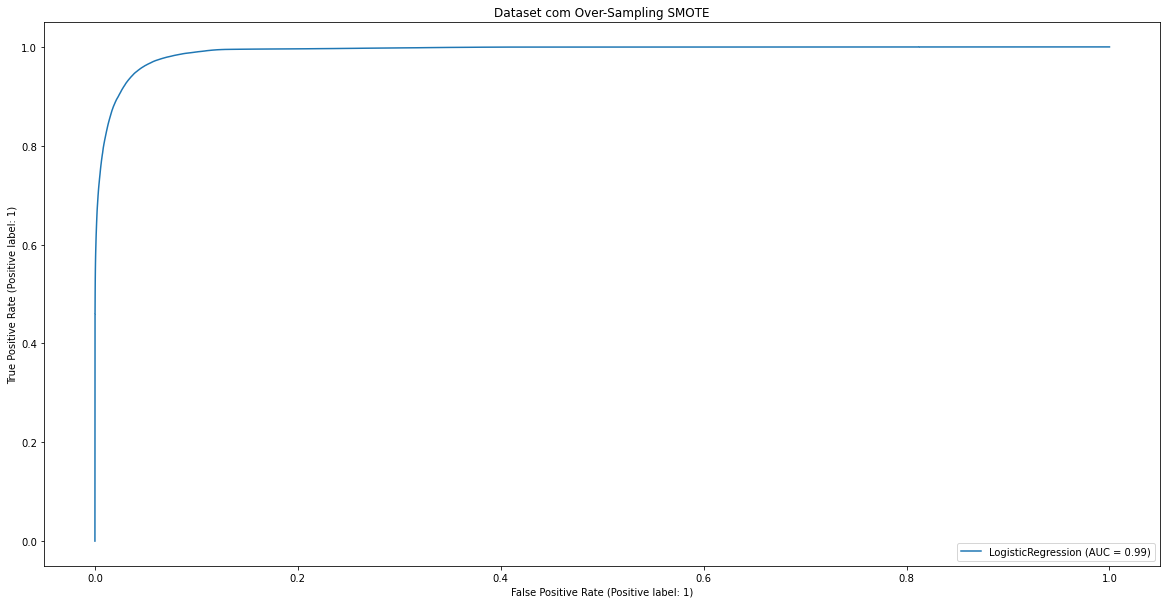

In [232]:
metrics.plot_roc_curve(logreg, X_smo, y_smo)
plt.title("Dataset com Over-Sampling SMOTE")
plt.show()

#### Balanceamento dos Dados com Over-Sampling (ADASYN)

In [235]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_ada))

Resultado após o oversampling Counter({0: 2852167, 1: 2845757})


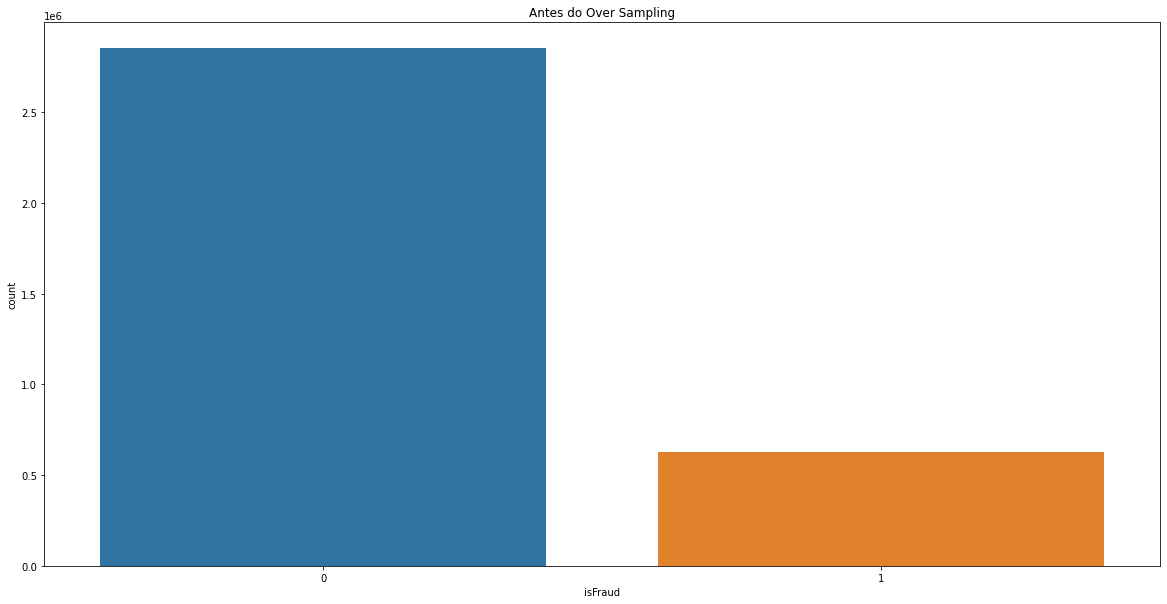

In [236]:
g = sns.countplot(y_train)
plt.title("Antes do Over Sampling")
plt.show()

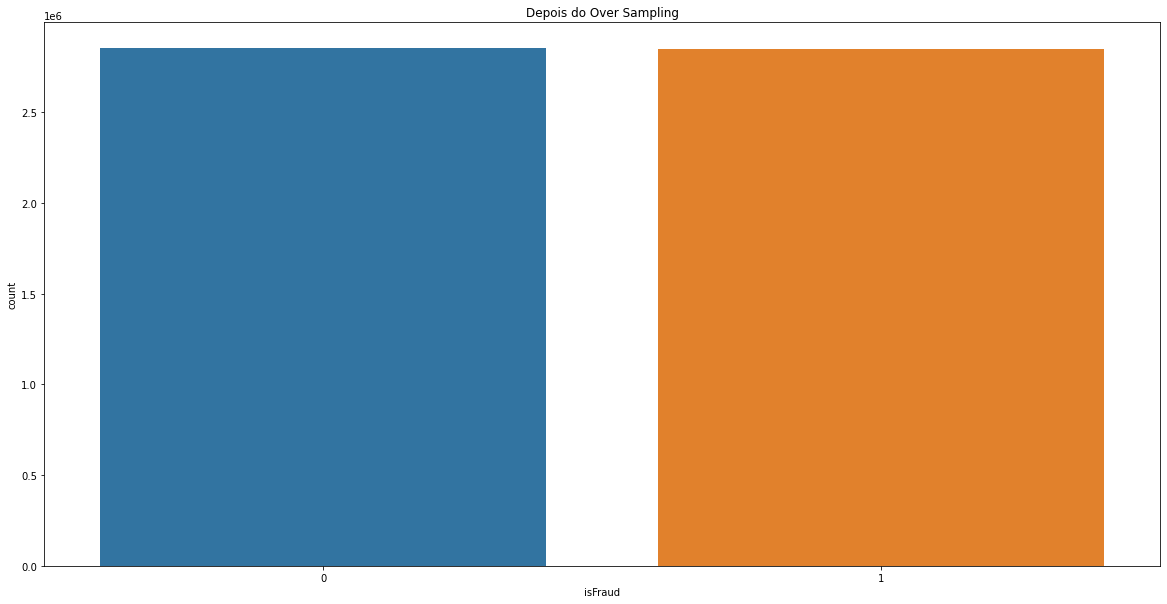

In [237]:
g = sns.countplot(y_ada)
plt.title("Depois do Over Sampling")
plt.show()

In [238]:
logreg = LogisticRegression()
logreg.fit(X_ada, y_ada)
y_pred = logreg.predict(X_test)

In [239]:
confusion_matrix(y_test, y_pred)

array([[1241656,  163585],
       [   1419,  307373]], dtype=int64)

In [240]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94   1405241
           1       0.65      1.00      0.79    308792

    accuracy                           0.90   1714033
   macro avg       0.83      0.94      0.86   1714033
weighted avg       0.94      0.90      0.91   1714033



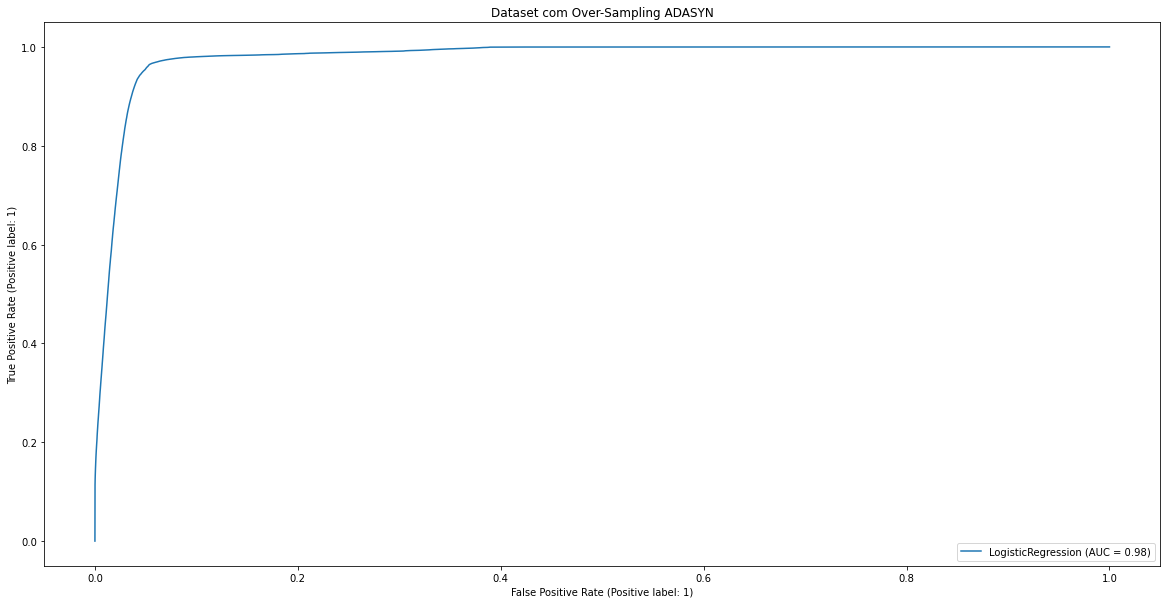

In [241]:
metrics.plot_roc_curve(logreg, X_ada, y_ada)
plt.title("Dataset com Over-Sampling ADASYN")
plt.show()

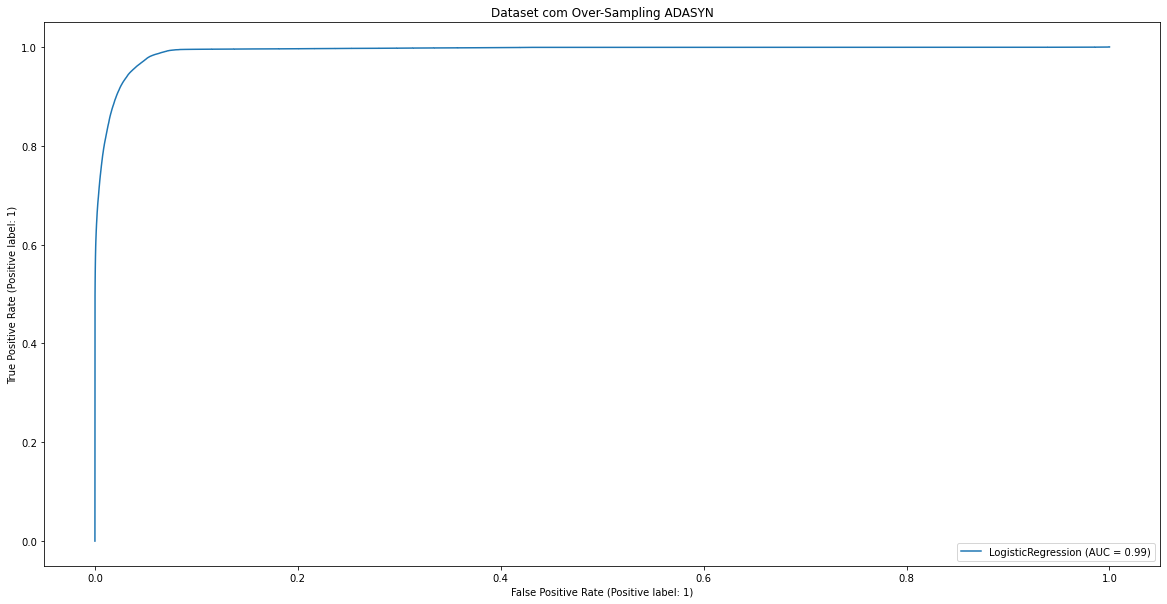

In [242]:
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.title("Dataset com Over-Sampling ADASYN")
plt.show()

#### Balancemaneto com SMOTEENN

In [244]:
sme = SMOTEENN()

print('Antes %s' % Counter(y_train))

X_res, y_res = sme.fit_resample(X_train, y_train)
print('Resultado após a aplicação das duas estratégias combinadas %s' % Counter(y_res))

Antes Counter({0: 2852167, 1: 627837})
Resultado após a aplicação das duas estratégias combinadas Counter({1: 2841254, 0: 2808052})


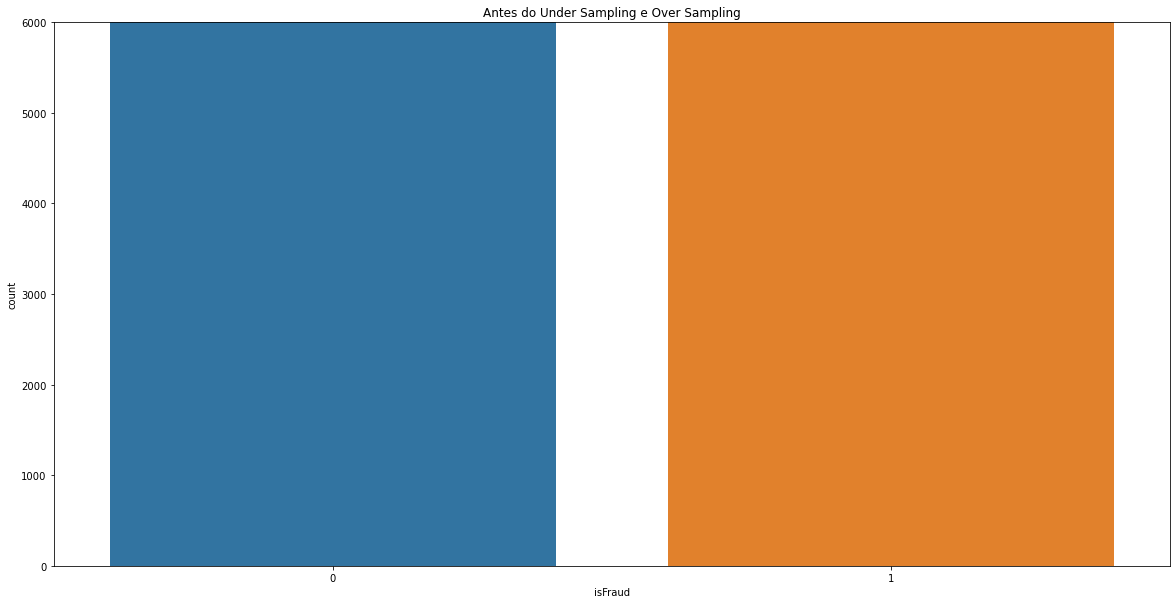

In [245]:
g = sns.countplot(y_train)
plt.title("Antes do Under Sampling e Over Sampling")
plt.ylim([0,6000])
plt.show()

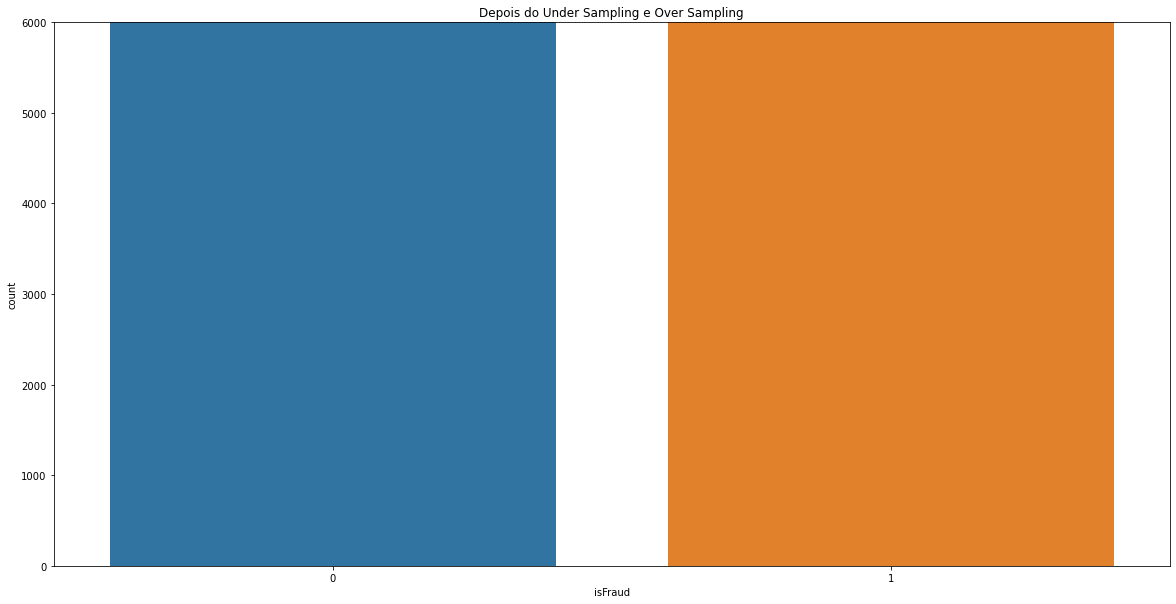

In [246]:
g = sns.countplot(y_res)
plt.title("Depois do Under Sampling e Over Sampling")
plt.ylim([0,6000])
plt.show()

In [247]:
logreg = LogisticRegression()
logreg.fit(X_res, y_res)
y_pred = logreg.predict(X_test)

In [248]:
confusion_matrix(y_test, y_pred)

array([[1333612,   71629],
       [  11193,  297599]], dtype=int64)

In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97   1405241
           1       0.81      0.96      0.88    308792

    accuracy                           0.95   1714033
   macro avg       0.90      0.96      0.92   1714033
weighted avg       0.96      0.95      0.95   1714033



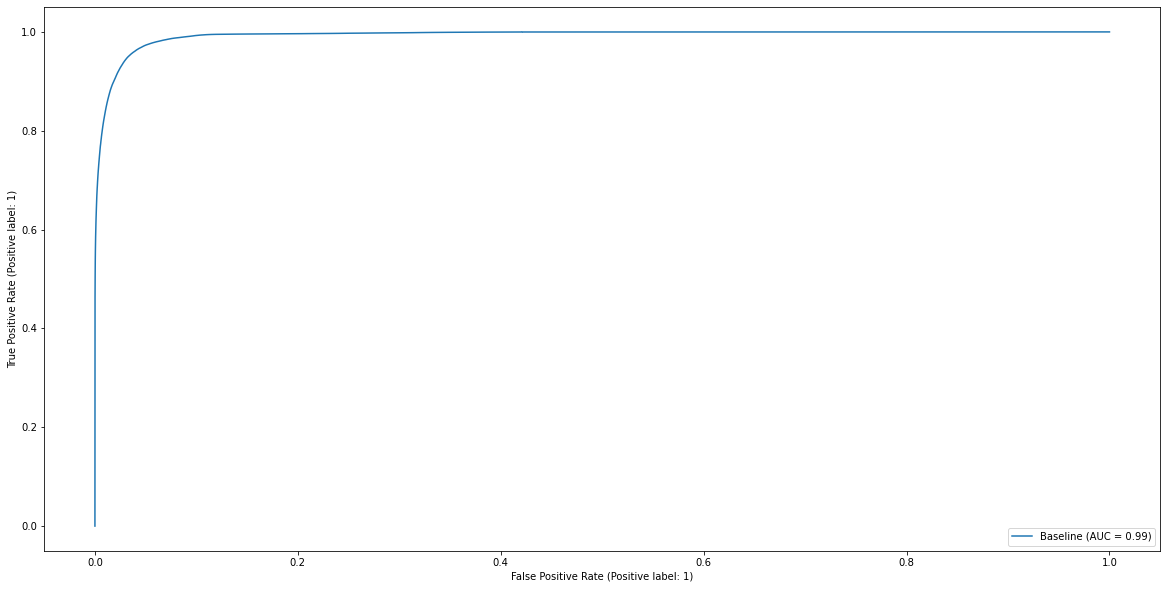

In [250]:
metrics.plot_roc_curve(logreg, X_res, y_res, name='Baseline')
plt.show()

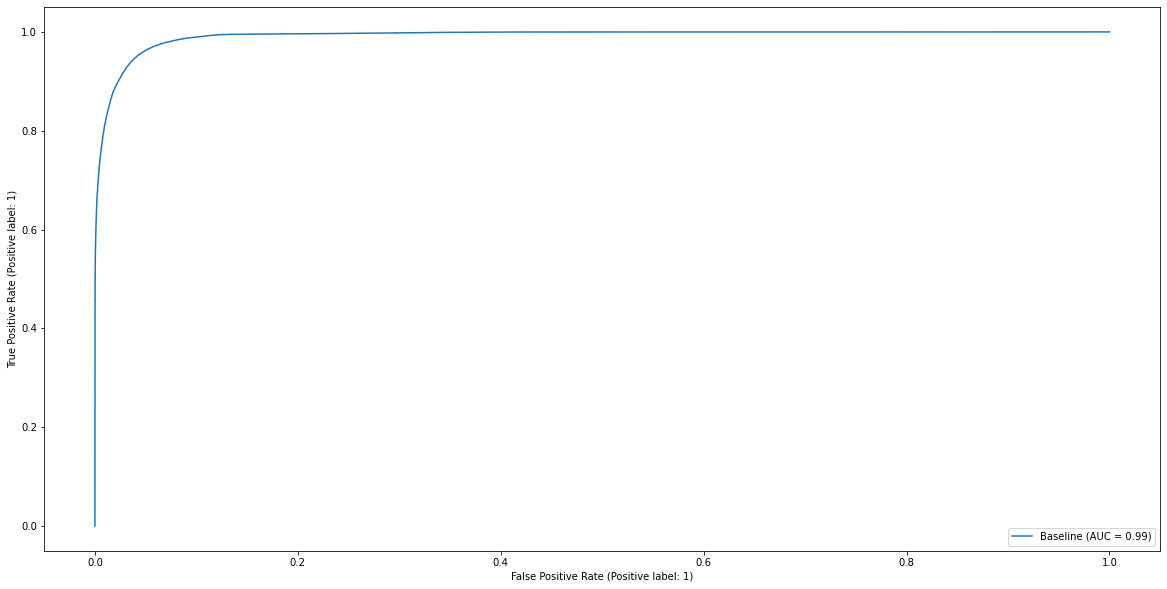

In [251]:
metrics.plot_roc_curve(logreg, X_test, y_test, name='Baseline')
plt.show()

#### Balanceamento dos Dados com Under-Sampling (RUS)

In [ ]:
#Demorou muito para rodar
print('Antes %s' % Counter(y_train))
cc = ClusterCentroids(random_state=42, sampling_strategy=0.35)
X_under, y_under = cc.fit_resample(X_train, y_train)
print('Resultado após o under sampling %s' % Counter(y_under))

In [ ]:
g = sns.countplot(y_train)
plt.title("Antes do Under Sampling")
plt.ylim([0,6000])
plt.show()

In [ ]:
g = sns.countplot(y_under)
plt.title("Depois do Under Sampling")
plt.ylim([0,6000])
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_under, y_under)
y_pred = logreg.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
metrics.plot_roc_curve(logreg, X_train, y_train, name='Under-sampling - Centroids')
plt.show()

In [ ]:
metrics.plot_roc_curve(logreg, X_test, y_test, name='Under-sampling - Centroids')
plt.show()

### Análises finais

In [256]:
y_df = pd.DataFrame(y_res, columns=['isFraud'])

In [257]:
X_df = pd.DataFrame(X_res, columns=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 
                                    'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'])

In [258]:
newdf = pd.concat([X_df, y_df], axis=1)
newdf

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,-0.257312,-0.324145,1.375893,1.587312,-0.300166,-0.337016,0,0,0,1,0,0
1,-0.658105,0.054952,-0.324820,-0.264662,0.240965,0.287223,0,0,0,0,1,0
2,0.226185,-0.152494,0.541042,0.758262,-0.222714,-0.326820,1,0,0,0,0,0
3,0.410677,-0.324357,-0.324820,-0.264662,-0.300166,-0.337016,0,0,0,1,0,0
4,0.219823,-0.316354,-0.323979,-0.264662,-0.300166,-0.337016,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5649301,1.879771,-0.279170,-0.304933,-0.264662,-0.250595,-0.275345,0,1,0,0,0,1
5649302,2.541880,-0.190967,-0.267998,-0.264662,-0.300166,-0.337016,0,0,0,0,1,1
5649303,-1.238508,0.026996,-0.176725,-0.264662,0.095489,0.145226,0,1,0,0,0,1
5649304,0.925983,-0.076940,-0.220249,-0.264662,-0.300166,-0.337016,0,0,0,0,1,1


#### Decision tree

In [262]:
# Decision Tree com dados desbalanceados
train_X, test_X, train_y, test_y = train_test_split(dfnormal.drop(columns=["isFraud"]), dfnormal.isFraud, test_size=1/7.0, random_state=0)

DT = tree.DecisionTreeClassifier()

DT.fit(train_X, train_y)

predictions = DT.predict(test_X)

In [263]:
print(DT.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, DT.predict(test_X)))

0.9993827543173506
[[608030    290]
 [   168 133518]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    608320
           1       1.00      1.00      1.00    133686

    accuracy                           1.00    742006
   macro avg       1.00      1.00      1.00    742006
weighted avg       1.00      1.00      1.00    742006



In [ ]:
plot_roc_curve(DT, X_train, y_train)

In [264]:
# Decision Tree com dados balanceados
train_X, test_X, train_y, test_y = train_test_split(newdf.drop(columns=["isFraud"]), newdf.isFraud, test_size=1/7.0, random_state=0)

DT = tree.DecisionTreeClassifier()

DT.fit(train_X, train_y)

predictions = DT.predict(test_X)

In [265]:
print(DT.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, DT.predict(test_X)))

0.9995440149483795
[[401392    245]
 [   123 405284]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    401637
           1       1.00      1.00      1.00    405407

    accuracy                           1.00    807044
   macro avg       1.00      1.00      1.00    807044
weighted avg       1.00      1.00      1.00    807044



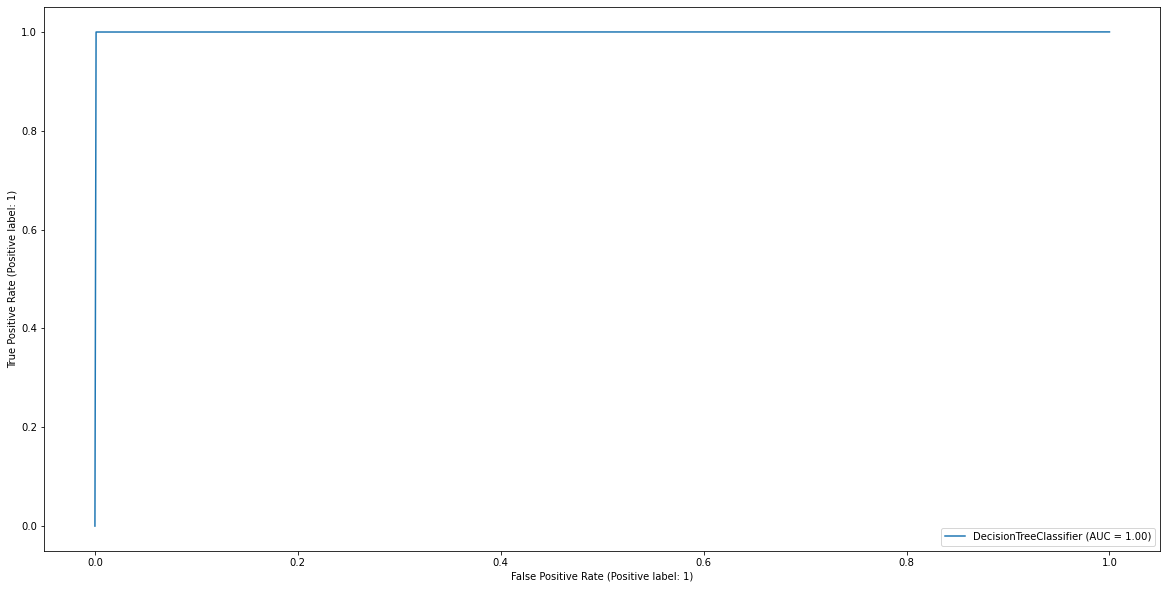

In [270]:
plot_roc_curve(DT, X_train, y_train)

#### Random Forest

In [266]:
# Random Forest com dados desbalanceados
train_X, test_X, train_y, test_y = train_test_split(dfnormal.drop(columns=["isFraud"]), dfnormal.isFraud, test_size=1/7.0, random_state=0)

RF = RandomForestClassifier()

RF.fit(train_X, train_y)

predictions = RF.predict(test_X)

In [267]:
print(RF.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, RF.predict(test_X)))

0.9994272283512532
[[607942    378]
 [    47 133639]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    608320
           1       1.00      1.00      1.00    133686

    accuracy                           1.00    742006
   macro avg       1.00      1.00      1.00    742006
weighted avg       1.00      1.00      1.00    742006



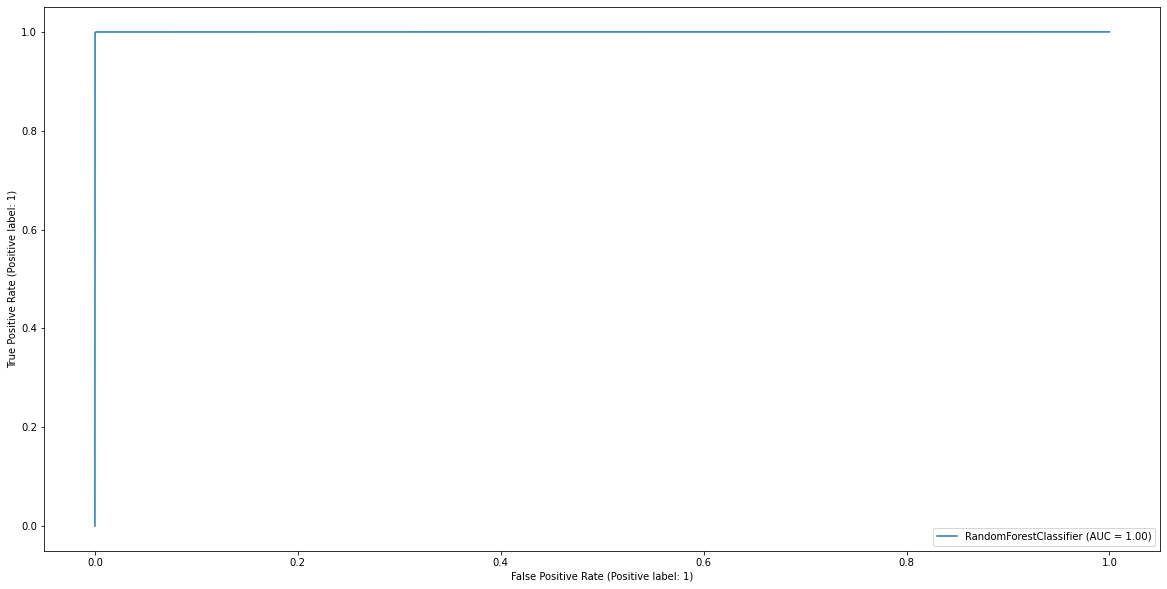

In [271]:
plot_roc_curve(RF, X_train, y_train)

In [268]:
# Random Forest com dados balanceados
train_X, test_X, train_y, test_y = train_test_split(newdf.drop(columns=["isFraud"]), newdf.isFraud, test_size=1/7.0, random_state=0)

RF = RandomForestClassifier()

RF.fit(train_X, train_y)

predictions = RF.predict(test_X)

In [269]:
print(RF.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, RF.predict(test_X)))

0.9997682902047472
[[401482    155]
 [    32 405375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    401637
           1       1.00      1.00      1.00    405407

    accuracy                           1.00    807044
   macro avg       1.00      1.00      1.00    807044
weighted avg       1.00      1.00      1.00    807044



In [ ]:
plot_roc_curve(DT, X_train, y_train)

#### Regressão Linear

In [272]:
# Regressão Logística com dados desbalanceados
train_X, test_X, train_y, test_y = train_test_split(dfnormal.drop(columns=["isFraud"]), dfnormal.isFraud, test_size=1/7.0, random_state=0)

LR = LogisticRegression()

LR.fit(train_X, train_y)

predictions = LR.predict(test_X)

In [273]:
print(LR.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, LR.predict(test_X)))

0.9673210189675016
[[600805   7515]
 [ 16733 116953]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    608320
           1       0.94      0.87      0.91    133686

    accuracy                           0.97    742006
   macro avg       0.96      0.93      0.94    742006
weighted avg       0.97      0.97      0.97    742006



In [ ]:
plot_roc_curve(LR, X_train, y_train)

In [274]:
# Regressão Logística com dados balanceados
train_X, test_X, train_y, test_y = train_test_split(newdf.drop(columns=["isFraud"]), newdf.isFraud, test_size=1/7.0, random_state=0)

LR = LogisticRegression()

LR.fit(train_X, train_y)

predictions = LR.predict(test_X)

In [275]:
print(LR.score(test_X, test_y))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, LR.predict(test_X)))

0.9610950580141852
[[384492  17145]
 [ 14253 391154]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    401637
           1       0.96      0.96      0.96    405407

    accuracy                           0.96    807044
   macro avg       0.96      0.96      0.96    807044
weighted avg       0.96      0.96      0.96    807044



In [ ]:
plot_roc_curve(LR, X_train, y_train)

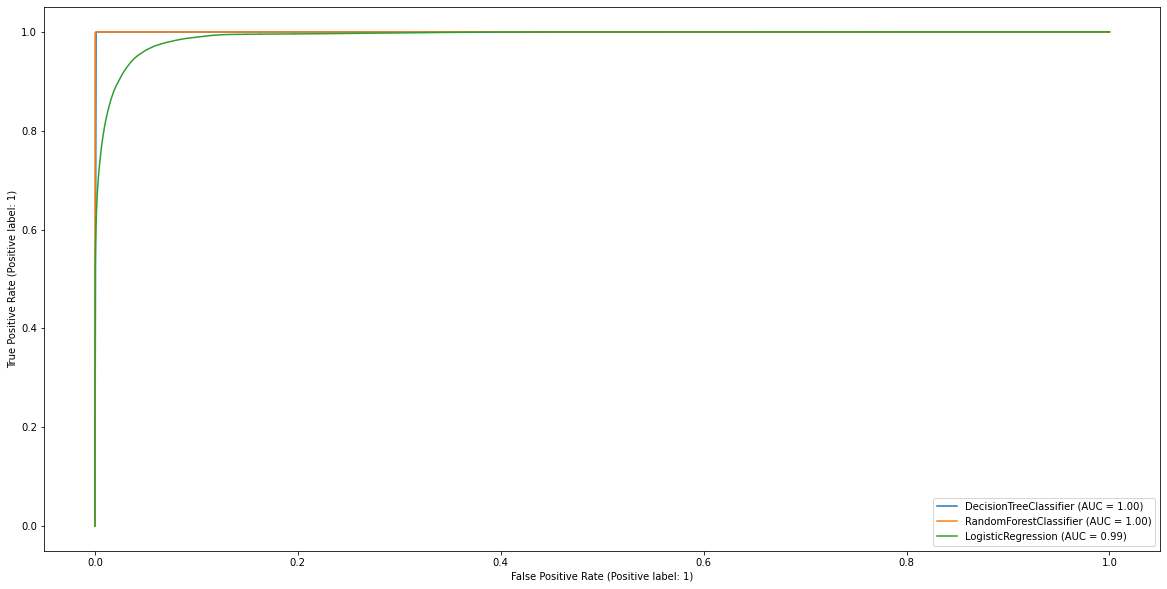

In [276]:
#Comparando os modelos
classifiers = [DT, RF, LR]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_train, y_train, ax=ax)

## Análise da Solução

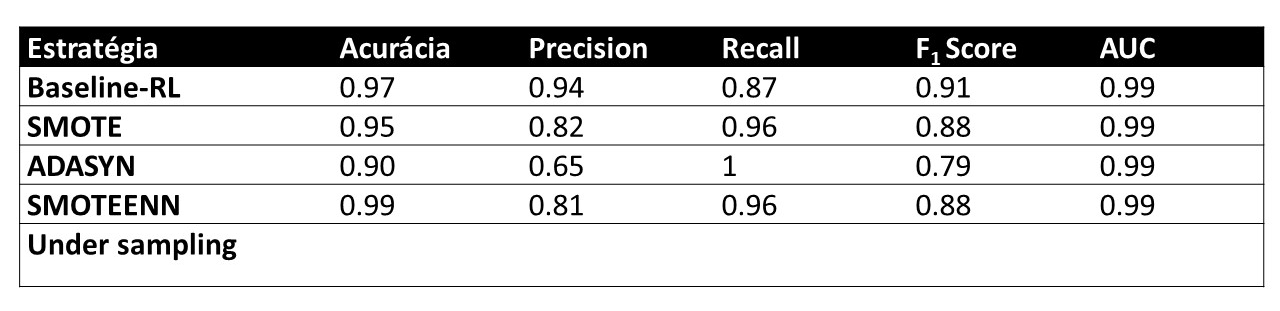

In [ ]:
# No balanceamento encontrou-se bons resultados, foi escolhido o SMOTTEENN para proseguir com as análises. 
# Mas, na matriz de confusão, considero os valores falso-negativo e falso-positivo muito altos ainda

# Nas análises finais, DecisionTree e RandonForest tiveram os melhores desempenhos em acurácia, precision, recall, F1Score, AUC,
# e na matriz de confusão.
